In [1]:
import pandas as pd
from sklearn import tree
import graphviz


In [29]:
data = pd.read_csv('decision_stats.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pop     14 non-null     bool 
 1   soda    14 non-null     bool 
 2   age     14 non-null     int64
 3   ice     14 non-null     bool 
dtypes: bool(3), int64(1)
memory usage: 282.0 bytes


In [23]:
target = data['ice']
print(target)


0     False
1     False
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12    False
13    False
Name: ice, dtype: bool


In [24]:
feature_data = data.drop( 'ice', axis=1)
print(feature_data)

      pop   soda  age
0    True   True    7
1    True  False   12
2   False   True   18
3   False   True   35
4    True   True   38
5    True  False   51
6   False  False   83
7    True   True    8
8    True  False   11
9   False   True   17
10  False   True   36
11   True   True   39
12   True  False   52
13  False  False   82


In [8]:
### prepare training and testing data

# from sklearn.model_selection import train_test_split
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(feature_data,target,test_size=0.1)

In [27]:
clf = tree.DecisionTreeClassifier(criterion="gini"
                                  , min_samples_leaf = 3)  ##  look at how min_samples_leaf change tree
clf = clf.fit(feature_data, target)


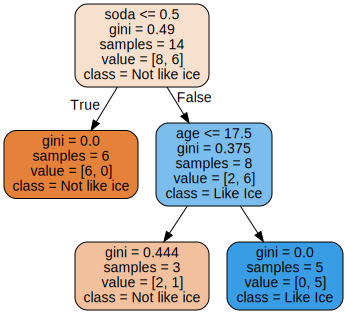

In [28]:
## draw the tree
import graphviz
dot_data = tree.export_graphviz(clf                               
                               ,class_names=["Not like ice","Like Ice"]
                                ,feature_names=data.columns[:3]
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph